In [41]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [42]:
data=pd.read_csv('train.csv')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [44]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [45]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [46]:
data.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


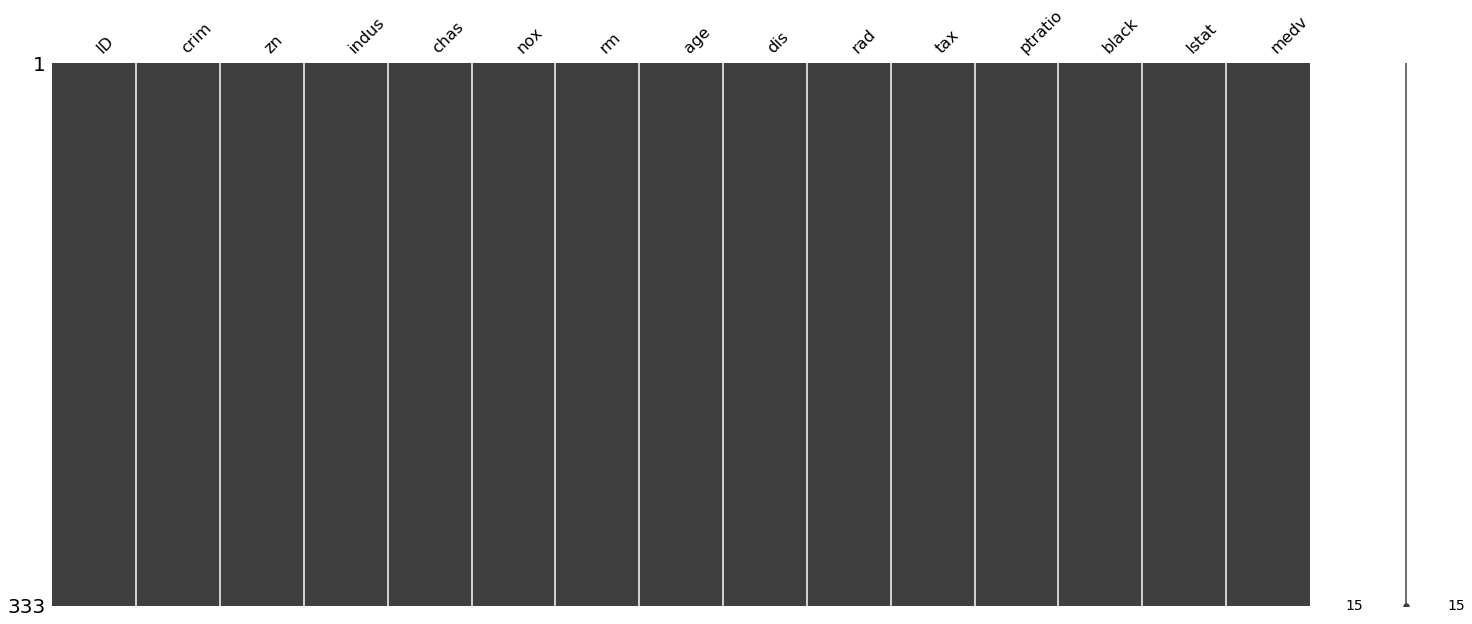

In [47]:
ms.matrix(data)

Text(0.5,1,'data.corr()')

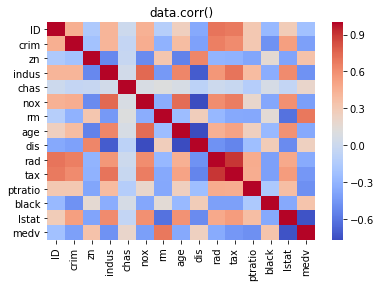

In [48]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data.corr()')

In [49]:
data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv',axis=1), 
                                                    data['medv'], test_size=0.30, 
                                                    random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predicted=lm.predict(X_test)

In [13]:
predicted=pd.DataFrame(predicted,columns=['medv'])

In [35]:
predicted.head()

,medv
0,25.357276
1,22.991957
2,23.195752
3,33.045936
4,25.000948


In [40]:
y_test.head()

,y_test


ValueError: x and y must be the same size

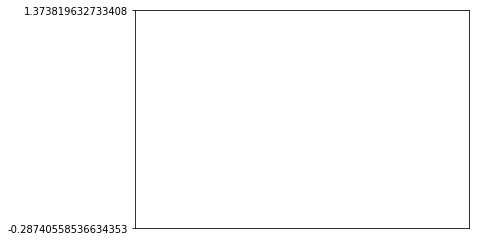

In [38]:
plt.scatter(y_test,predicted)

In [17]:
test_data=pd.read_csv('test.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [20]:
test_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [21]:
predicted1=lm.predict(test_data)

In [22]:
predicted1

array([30.82282476, 25.60785608, 17.71608446,  8.90251874, 17.14658109,
       17.38285097, 19.57018733, 15.68945612, 13.63685589, 15.52763079,
       19.69033912, 21.3085829 ,  8.62062922, 14.44971503, 25.0209544 ,
       23.57999993, 24.62212458, 28.97769763,  6.53505317, 27.94379719,
       21.79293601, 24.25218925, 20.78287087, 22.23539027, 20.75430008,
       22.73525446, 27.02512653, 27.78462965, 29.62101187, 29.19406818,
       35.97246326, 36.13280368, 32.62269356, 22.17729685, 19.04728017,
       21.83547972, 20.58124295, 20.30210908, 20.33904736, 21.95986912,
       13.79352782, 19.90734858, 19.96755264, 16.85264172, 12.99187405,
       10.94802577,  7.4116797 , 15.33876656, 17.81440757, 22.10205206,
       22.13308609, 32.56360342, 41.97869789, 25.28971753, 22.31580094,
       24.63633643, 32.96124373, 41.38663337, 34.93525395, 33.2547953 ,
       30.29703633, 37.18891865, 16.48102483, 17.16639287, 23.02541473,
       24.3177249 , 24.4098631 , 27.21099086, 25.50743694, 30.53

In [23]:
prediction1=pd.DataFrame(predicted,columns=['medv'])

In [24]:
prediction1.count()

medv    100
dtype: int64

In [25]:
result=test_data['ID']

In [26]:
type(predicted1)

numpy.ndarray

In [27]:
pd1=pd.DataFrame(predicted1,columns=['medv'])

In [28]:
final=pd.concat([result,pd1],axis=1)

In [29]:
final.to_csv('Results.csv',index=False)

In [30]:
final.head()

,ID,medv
0,3,30.822825
1,6,25.607856
2,8,17.716084
3,9,8.902519
4,10,17.146581


In [31]:
y_test.count()

100

In [32]:
predicted

,medv
0,25.357276
1,22.991957
2,23.195752
3,33.045936
4,25.000948
5,13.937844
6,17.331088
7,30.404021
8,15.615468
9,24.935633


In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicted))

print('MSE:', metrics.mean_squared_error(y_test, predicted))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 3.441444887950678
MSE: 21.099820900351965
RMSE: 4.593454136088872
